In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd

In [52]:
captions=pd.read_csv('captions.csv')

In [53]:
captions.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [54]:
captions['caption'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 40455 entries, 0 to 40454
Series name: caption
Non-Null Count  Dtype 
--------------  ----- 
40455 non-null  object
dtypes: object(1)
memory usage: 316.2+ KB


In [55]:
captions['caption'].describe()

count                              40455
unique                             40201
top       Two dogs playing in the snow .
freq                                   7
Name: caption, dtype: object

In [456]:
sequences=captions['caption'].tolist()

In [457]:
sequences[:5]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [458]:
for i in range(len(sequences)):
    sequences[i]="start "+sequences[i]+" end"

In [459]:
sequences[:5]

['start A child in a pink dress is climbing up a set of stairs in an entry way . end',
 'start A girl going into a wooden building . end',
 'start A little girl climbing into a wooden playhouse . end',
 'start A little girl climbing the stairs to her playhouse . end',
 'start A little girl in a pink dress going into a wooden cabin . end']

In [460]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer()
tokenizer.fit_on_texts(sequences)

In [461]:
import pickle

In [462]:
import pickle
with open('tokenizer_data.pkl','wb') as f:
    pickle.dump({'tokenizer':tokenizer},f)

In [463]:
tokenizer.word_index.items()

dict_items([('a', 1), ('end', 2), ('start', 3), ('in', 4), ('the', 5), ('on', 6), ('is', 7), ('and', 8), ('dog', 9), ('with', 10), ('man', 11), ('of', 12), ('two', 13), ('white', 14), ('black', 15), ('boy', 16), ('are', 17), ('woman', 18), ('girl', 19), ('to', 20), ('wearing', 21), ('at', 22), ('people', 23), ('water', 24), ('red', 25), ('young', 26), ('brown', 27), ('an', 28), ('his', 29), ('blue', 30), ('dogs', 31), ('running', 32), ('through', 33), ('playing', 34), ('while', 35), ('shirt', 36), ('down', 37), ('standing', 38), ('ball', 39), ('little', 40), ('grass', 41), ('snow', 42), ('child', 43), ('person', 44), ('jumping', 45), ('over', 46), ('three', 47), ('front', 48), ('sitting', 49), ('holding', 50), ('up', 51), ('field', 52), ('small', 53), ('by', 54), ('large', 55), ('green', 56), ('one', 57), ('group', 58), ('yellow', 59), ('her', 60), ('walking', 61), ('children', 62), ('men', 63), ('into', 64), ('air', 65), ('beach', 66), ('near', 67), ('mouth', 68), ('jumps', 69), ('ano

In [464]:
max_length=max(len(s.split(" ")) for s in sequences)

In [465]:
max_length

40

In [466]:
def tokenize(sequence):
    sequence=tokenizer.texts_to_sequences(sequence)[0]

    input_sequence=[]
    for j in range(1,len(sequence)):
        n_gram_sequence=sequence[:j+1]
        input_sequence.append(n_gram_sequence)

    input_sequences=np.array(pad_sequences(input_sequence,maxlen=40,padding='pre'))

    xs = input_sequences[:,:-1]
    labels = input_sequences[:,-1]

    return xs,labels


In [475]:
def getdata(data):
    xs,labels=tokenize(data)
    xs=np.array(xs)
    labels=np.array(labels)
    img=captions[captions['caption']==data[0][6:-4]]['image']
    img=cv2.imread('Images/'+img.iloc[0])
    img=cv2.resize(img,(224,224))
    img=img/255.0
    images=[img]*len(xs)
    return xs,labels,images

In [476]:
getdata([sequences[0]])

(array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    3],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    3,    1],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    3,    1,   43],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0

In [417]:
def create_dataset(n):
    xs=[]
    labels=[]
    images=[]
    for i in sequences[n:n+1]:
        x,label,image=getdata([i])
        xs.extend(x)
        labels.extend(label)
        images.extend(image)

    xs=np.array(xs)
    labels=np.array(labels)
    images=np.array(images)

    labels = tf.keras.utils.to_categorical(labels, num_classes=8493)
    
        
    return xs,images,labels

In [418]:
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,Conv2D,MaxPooling2D,Flatten,Dropout,concatenate,add,Reshape

In [478]:
max_length=40

In [479]:
input1 = Input(shape=(224,224,3))
input2 = Input(shape=(max_length,))

x1 = Conv2D(32,(3,3),activation='relu')(input1)
x1 = MaxPooling2D((2,2))(x1)
x1 = Conv2D(16,(3,3),activation='relu')(x1)
x1 = MaxPooling2D((2,2))(x1)

x1 = Flatten()(x1)
x1 = Dense(128,activation='relu')(x1)
x1 = Dropout(0.5)(x1)

x3=Reshape((1,128))(x1)
x2 = Embedding(8493,128,input_length=max_length)(input2)
x3=concatenate([x3,x2],axis=1)
x2=LSTM(128,return_sequences=False)(x3)
x2 = Dense(128,activation='relu')(x2)

x = add([x1,x2])
x = Dense(128,activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(8493,activation='softmax')(x)


2023-09-04 18:23:26.910323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-04 18:23:26.911848: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-04 18:23:26.912821: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [480]:
model=tf.keras.Model(inputs=[input2,input1],outputs=x)

In [481]:
# model=tf.keras.models.load_model('model.h5')

In [482]:
from tensorflow.keras.utils import plot_model

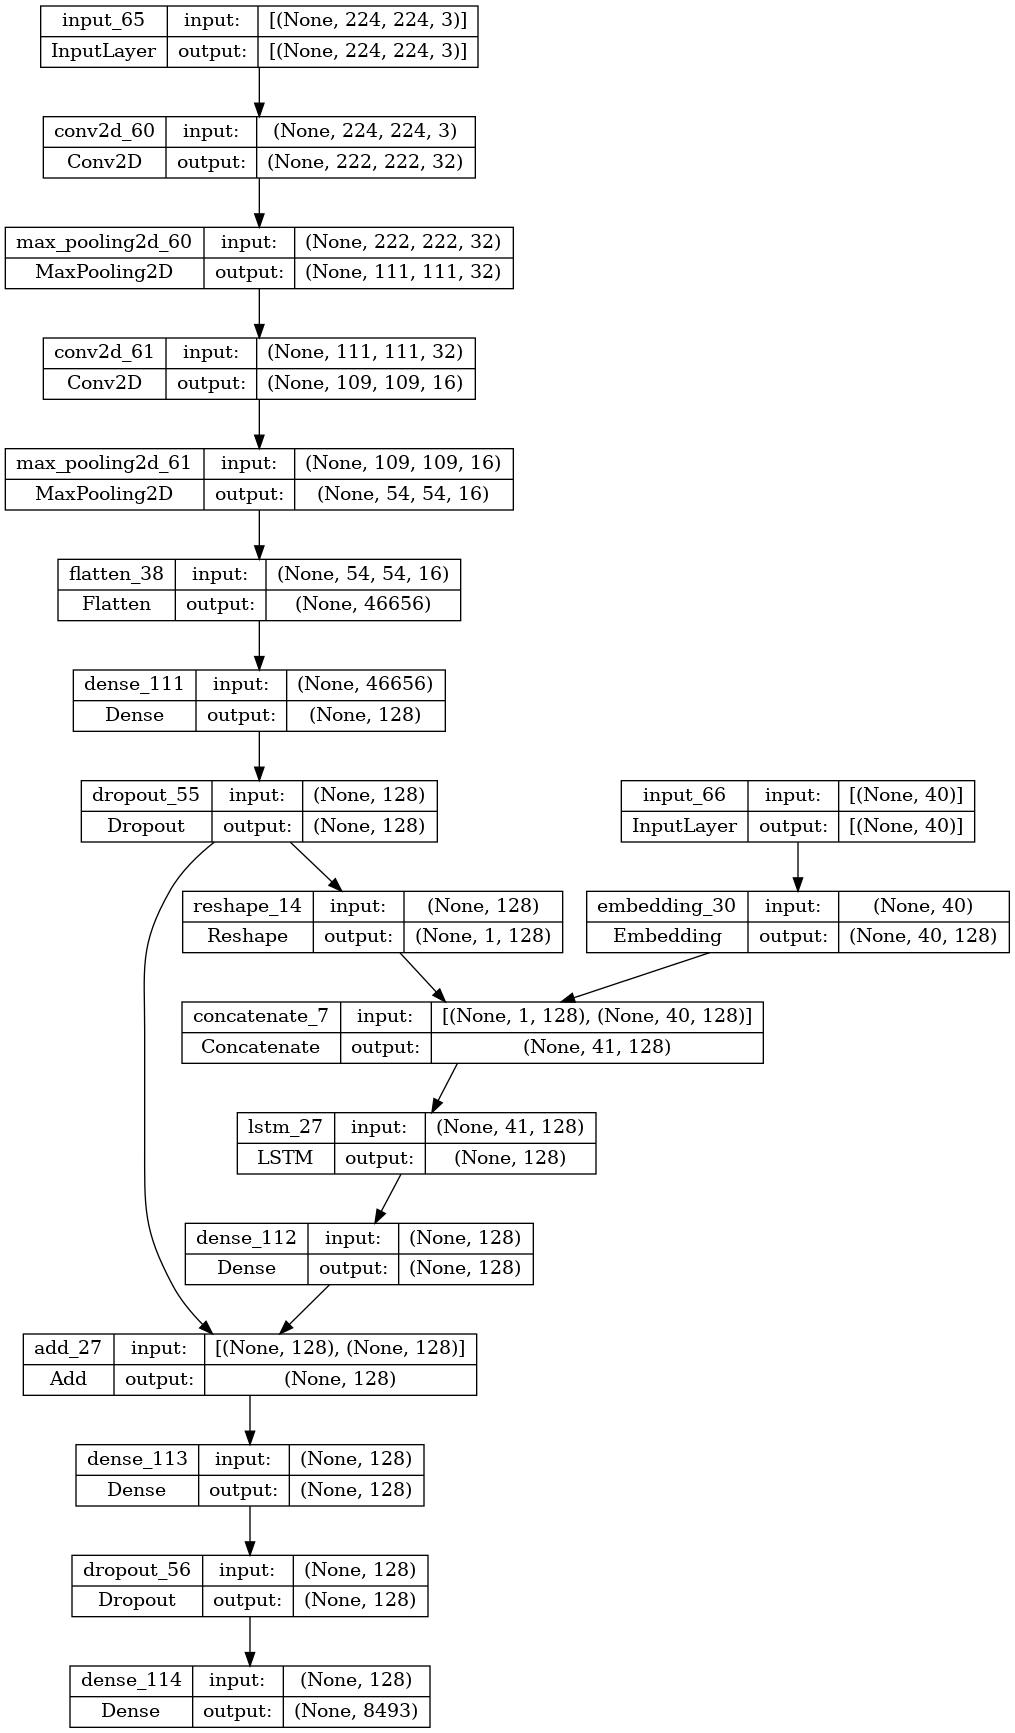

In [483]:
plot_model(model,show_shapes=True)

In [484]:
model.summary()

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_65 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_60 (Conv2D)             (None, 222, 222, 32  896         ['input_65[0][0]']               
                                )                                                                 
                                                                                                  
 max_pooling2d_60 (MaxPooling2D  (None, 111, 111, 32  0          ['conv2d_60[0][0]']              
 )                              )                                                          

In [485]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])

In [486]:
n=[x for x in range(0,8000,1)]
print(len(n))

8000


In [487]:
class datagenerator(tf.keras.utils.Sequence):
    def __init__(self):
        self.n=0
        self.base=0

    def on_epoch_end(self):
        self.base=self.base

    def __getitem__(self,index):
        self.n=self.base+index
        X1,X2,Y=create_dataset(self.n)
        Y=tf.expand_dims(Y,axis=-1)      
        return [X1,X2],Y

    def __len__(self):
        return 200

In [488]:
datagen=datagenerator()

In [489]:
a,b=data=datagen.__getitem__(0)

In [490]:
b.shape

TensorShape([18, 8493, 1])

In [492]:
model.fit(datagen,epochs=100,shuffle=False)

Epoch 1/100


2023-09-04 18:31:20.317947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


200/200 [==============================] - 5s 24ms/step - loss: 0.5401 - accuracy: 0.8294
Epoch 2/100
200/200 [==============================] - 5s 23ms/step - loss: 0.5784 - accuracy: 0.8162
Epoch 3/100
200/200 [==============================] - 19s 93ms/step - loss: 0.5764 - accuracy: 0.8170
Epoch 4/100
200/200 [==============================] - 29s 145ms/step - loss: 0.5594 - accuracy: 0.8266
Epoch 5/100
200/200 [==============================] - 27s 137ms/step - loss: 0.5439 - accuracy: 0.8311
Epoch 6/100
200/200 [==============================] - 26s 130ms/step - loss: 0.5280 - accuracy: 0.8311
Epoch 7/100
200/200 [==============================] - 26s 127ms/step - loss: 0.5329 - accuracy: 0.8315
Epoch 8/100
200/200 [==============================] - 26s 131ms/step - loss: 0.5367 - accuracy: 0.8198
Epoch 9/100
200/200 [==============================] - 26s 128ms/step - loss: 0.5143 - accuracy: 0.8302
Epoch 10/100
200/200 [==============================] - 27s 136ms/step - loss: 0.

In [495]:
def predict(image,tokenizer,model):
    img=cv2.imread(image)
    plt.imshow(img)
    img=cv2.resize(img,(224,224))
    img=img/255.0
    img=np.array([img])
    img.shape
    in_text='start'
    for i in range(38):
        sequence=tokenizer.texts_to_sequences([in_text])[0]
        sequence=pad_sequences([sequence],maxlen=40,padding='pre')
        sequence=np.array(sequence)
        y=model.predict([sequence,img],verbose=0)
        y=np.argmax(y)
        word=''
        for word,index in tokenizer.word_index.items():
            if index==y:
                word=word
                break
        in_text+=' '+word
        if word=='end':
            break
    return in_text

'start a white dog is about to catch a yellow dog toy end'

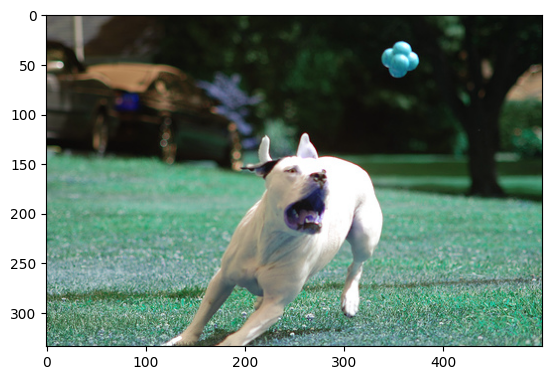

In [503]:
predict('./Images/1019604187_d087bf9a5f.jpg',tokenizer,model)

In [497]:
model.save('model.h5')